code used to create a directory

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

get the below api command key from kaggle datasets

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 253MB/s]
100% 1.06G/1.06G [00:04<00:00, 246MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()
# commands used to unzip the file

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
#  using generators so that data is loaded in small batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# normalizing the data
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label # this function is taking every image one by one and normalizing it .

# down here we are saving the image in the same folder

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [14]:
# creating a cnn model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

#predicting the model with new image from internet

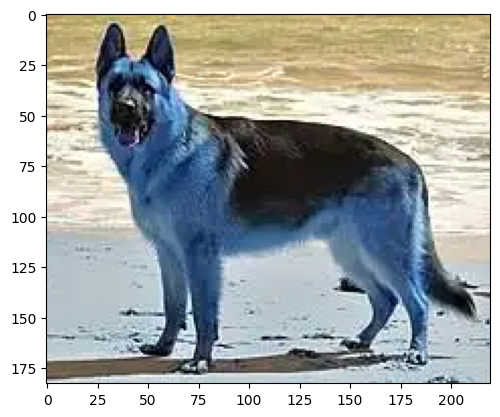

In [22]:
import matplotlib.pyplot as plt
import cv2
test_img=cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

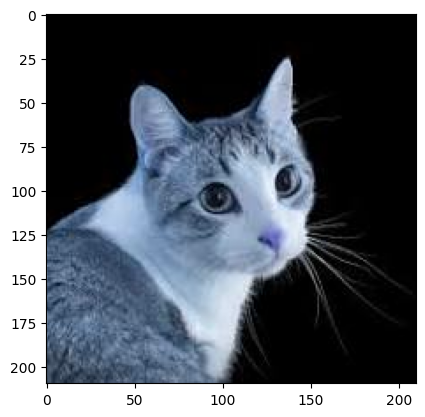

In [24]:
test_img_cat=cv2.imread('/content/cat.jpg')
plt.imshow(test_img_cat)

In [25]:
test_img_cat.shape

(210, 210, 3)

In [26]:
test_img.shape


(183, 220, 3)

In [27]:
test_img=cv2.resize(test_img,(256,256))

In [28]:
test_img_cat=cv2.resize(test_img_cat,(256,256))

In [29]:
test_input_cat=test_img_cat.reshape((1,256,256,3))
# as we know we pass the data in batches but here we have only 1 image so we are converting it intto 4d tensor
test_input_dog=test_img.reshape((1,256,256,3))

In [31]:
prediction=model.predict(test_input_dog)
print(prediction)# 1 means dog

1/1 [==============================] - 0s 18ms/step
[[1.]]


In [32]:
prediction2=model.predict(test_input_cat)
print(prediction2)# 0 means cat

1/1 [==============================] - 0s 72ms/step
[[0.]]
